Tutorial: Field-maps
===============================
This is an example how to calculate the electric and magnetic field *outside* the nano-structure.


In [1]:
from pyGDM2 import core
from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields
from pyGDM2 import linear
from pyGDM2 import tools
from pyGDM2 import visu

import matplotlib.pyplot as plt

Simulation: Silicon nanowire
------------------------------

We will setup a simulation for a cuboidal silicon nanowire, evaluated at a single wavelength and linear polarization. For the polarization angle we will use an angle somewhat off the nanowire long axis:

N dipoles: 600


/home/hans/.local/lib/python3.7/site-packages/pyGDM2-1.1rc1-py3.7-linux-x86_64.egg/pyGDM2/visu.py:48: UserWarning: 3D data. Falling back to XY projection...
  warnings.warn("3D data. Falling back to XY projection...")


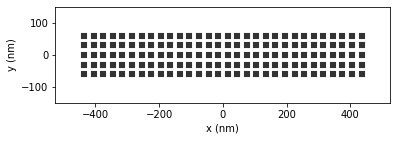

timing for wl=600.00nm - setup: 290.2 ms, inv.: 371.5 ms, repropa.: 4.2ms (1 field configs), tot: 666.4 ms


In [2]:
## ---------- Setup structure
mesh = 'cube'
step = 30.0
geometry = structures.rect_wire(step, L=30,H=4,W=5, mesh='cube')
geometry = structures.center_struct(geometry)
material = materials.silicon()
n1, n2 = 1.0, 1.0  # constant environment

struct = structures.struct(step, geometry, material, n1,n2, 
                                       structures.get_normalization('cube'))


## ---------- Setup incident field
field_generator = fields.planewave
kwargs = dict(theta = [30.0])
wavelengths = [600]
efield = fields.efield(field_generator, wavelengths=wavelengths, kwargs=kwargs)


## ---------- Simulation initialization
sim = core.simulation(struct, efield)

print("N dipoles:", len(sim.struct.geometry))
visu.structure(geometry, scale=0.7)

#==============================================================================
# run the simulation
#==============================================================================
E = core.scatter(sim)

OK, now we need to
calculate field-maps outside the structure
--------------------------------------------------

We will do several field-maps at increasing *distances* from the nanowire and compare those.

In [3]:
#==============================================================================
# Nearfield map below structure
#==============================================================================
distances = [-1*step, -3*step, -5*step, -7*step]

Es = []
Bs = []
Etot = []
Btot = []
for Z0 in distances:
    MAP = tools.generate_NF_map_XY(-500,500,51, -500,500,51, Z0=Z0)
    
    ## --- linear.nearfield takes either a whole "map" or only a
    ## --- 3D coordinate as input. Here we want the field on a map.
    _Es, _Etot, _Bs, _Btot = linear.nearfield(sim, field_index=0, r_probe=MAP)
    Es.append(_Es)
    Etot.append(_Etot)
    Bs.append(_Bs)
    Btot.append(_Btot)

Using the **visu** module, we plot the fields as 2D vector representation as well as the field-intensity as colorplot.

Scattered electric field
-------------------------

/home/hans/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:179: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)


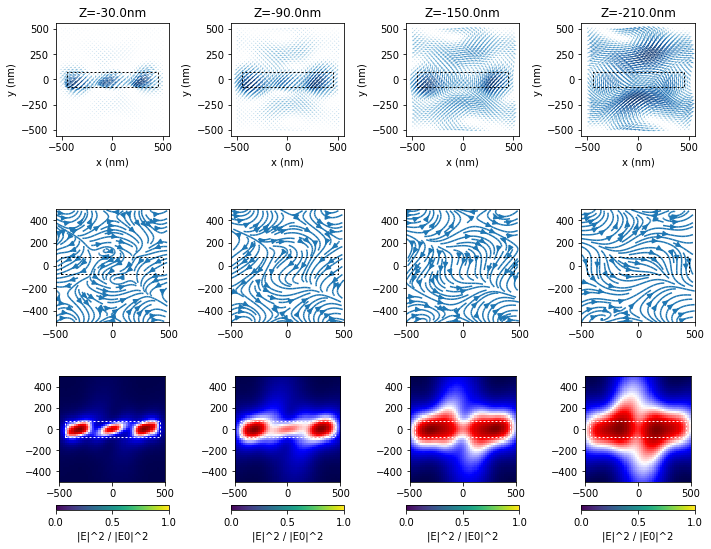

In [4]:
## --- limit the number of ticks on the axes (for the colorbar!)
from matplotlib.ticker import MaxNLocator
MaxNLocator.default_params['nbins'] = 4

## the plot
plt.figure(figsize=(10, 8))

for i, _Es in enumerate(Es):
    ## --- field vectors
    plt.subplot(3,len(Es),1+i, aspect='equal')
    plt.title("Z={}nm".format(distances[i]))
    visu.structure_contour(sim, zorder=10, dashes=[2,2], color='k', show=0)
    visu.vectorfield(_Es, show=0, EACHN=2)
    
    ## --- field isolines
    plt.subplot(3,len(Es),1+1*len(Es)+i, aspect='equal')
    visu.structure_contour(sim, zorder=10, dashes=[2,2], color='k', show=0)
    visu.vectorfield_fieldlines(_Es, show=0)

    ## --- field intensity
    plt.subplot(3,len(Es),1+2*len(Es)+i, aspect='equal')
    visu.structure_contour(sim, zorder=10, dashes=[2,2], color='w', show=0)
    visu.vectorfield_color(_Es, show=0)
    plt.colorbar(orientation='horizontal', label="|E|^2 / |E0|^2")

plt.tight_layout()
plt.show()

Scattered magnetic field
-------------------------

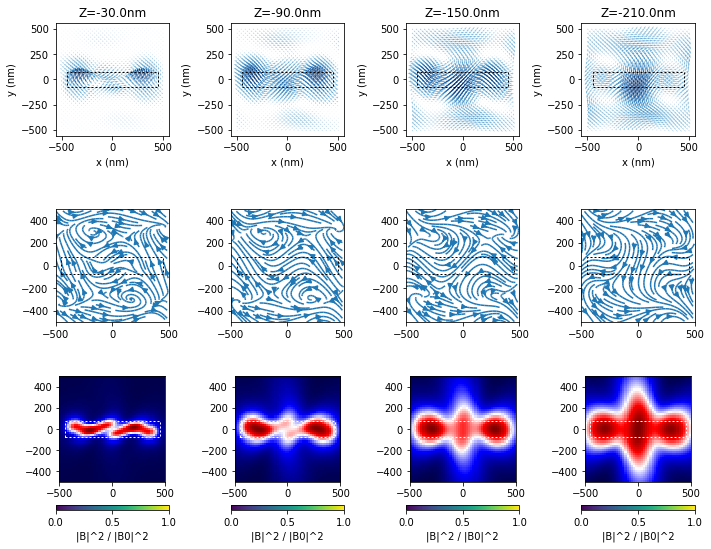

In [5]:
plt.figure(figsize=(10, 8))

for i, _Bs in enumerate(Bs):
    ## --- field vectors
    plt.subplot(3,len(Bs),1+i, aspect='equal')
    plt.title("Z={}nm".format(distances[i]))
    visu.structure_contour(sim, zorder=10, dashes=[2,2], color='k', show=0)
    visu.vectorfield(_Bs, show=0, EACHN=2)
    
    ## --- field isolines
    plt.subplot(3,len(Bs),1+1*len(Bs)+i, aspect='equal')
    visu.structure_contour(sim, zorder=10, dashes=[2,2], color='k', show=0)
    visu.vectorfield_fieldlines(_Bs, show=0)

    ## --- field intensity
    plt.subplot(3,len(Bs),1+2*len(Bs)+i, aspect='equal')
    visu.structure_contour(sim, zorder=10, dashes=[2,2], color='w', show=0)
    visu.vectorfield_color(_Bs, show=0)
    plt.colorbar(orientation='horizontal', label="|B|^2 / |B0|^2")

plt.tight_layout()
plt.show()